In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from adjustText import adjust_text

In [2]:
coli_aas = pd.read_csv('../data/genomes/Coli/MG1655/MG1655_CDS_aafreq.csv', index_col=0)
scer_aas = pd.read_csv('../data/genomes/Scer/S288c/Scer_S288c_CDS_aafreq.csv', index_col=0)
aa_nosc_df = pd.read_csv('../data/aa_nosc.csv').set_index('letter_code')
coli_aas.head()

,aa_freq
letter_code,
A,0.095532
R,0.055253
N,0.038926
D,0.051345
C,0.011575


In [3]:
deltas = scer_aas - coli_aas.loc[scer_aas.index]
relative_deltas = (deltas/coli_aas.loc[scer_aas.index]).sort_values('aa_freq')

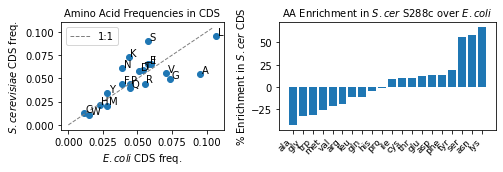

In [4]:
coli_freqs = coli_aas.loc[scer_aas.index].values
scer_freqs = scer_aas.values

fig, axs = plt.subplots(ncols=2, figsize=(7,2.5), gridspec_kw=dict(width_ratios=[1.5,2]))

plt.sca(axs[0])
plt.scatter(coli_freqs, scer_freqs)
plt.xlabel('$E. coli$ CDS freq.', fontsize=10)
plt.ylabel('$S. cerevisiae$ CDS freq.', fontsize=10)

ts = [] 
for aa in scer_aas.index:
    xloc = coli_aas.loc[aa] + 0.001
    yloc = scer_aas.loc[aa] + 0.001
    ts.append(plt.annotate(aa, (xloc, yloc)))
xs = np.arange(0, 0.11, 0.005)
plt.plot(xs, xs, ls='--', c='grey', lw=1, label='1:1')
plt.legend()
plt.title('Amino Acid Frequencies in CDS', fontsize=10)

plt.sca(axs[1])
plt.title('AA Enrichment in $S. cer$ S288c over $E. coli$', fontsize=10)
xs = np.arange(relative_deltas.size)
plt.bar(xs, relative_deltas.aa_freq.values*100)

labels = aa_nosc_df.loc[relative_deltas.index].short_name
plt.xticks(xs, labels, rotation=45, ha='right', fontsize=9)
plt.ylabel('% Enrichment in $S. cer$ CDS', fontsize=10)

plt.tight_layout()
plt.savefig('../output/scer_coli_aa_freq_comparison.png', facecolor='w', dpi=300)
plt.show()

In [5]:
coli_aas_expression_weighted = pd.read_csv('../data/proteomes/Coli/Schmidt_mu0.5_expression_weighted_aa_freqs.csv', index_col=0)
scer_aas_expression_weighted = pd.read_csv('../data/proteomes/Scer/Xia_mu0.379_expression_weighted_aa_freqs.csv', index_col=0)

deltas = scer_aas_expression_weighted - coli_aas_expression_weighted.loc[scer_aas_expression_weighted.index]
relative_deltas = (deltas/coli_aas_expression_weighted.loc[scer_aas_expression_weighted.index]).sort_values('aa_freq')
relative_deltas

,aa_freq
M,-0.275627
G,-0.168466
A,-0.166235
V,-0.072589
Q,-0.070877
R,-0.048556
D,-0.033800
L,-0.017553
E,-0.003962
W,-0.000032


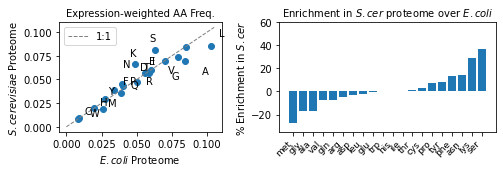

In [7]:
coli_freqs = coli_aas_expression_weighted.loc[scer_aas_expression_weighted.index].values
scer_freqs = scer_aas_expression_weighted.values

fig, axs = plt.subplots(ncols=2, figsize=(7,2.5), gridspec_kw=dict(width_ratios=[1.5,2]))

plt.sca(axs[0])
plt.scatter(coli_freqs, scer_freqs)
plt.xlabel('$E. coli$ Proteome', fontsize=10)
plt.ylabel('$S. cerevisiae$ Proteome', fontsize=10)

ts = [] 
for aa in scer_aas.index:
    xloc = coli_aas.loc[aa] + 0.001
    yloc = scer_aas.loc[aa] + 0.001
    ts.append(plt.annotate(aa, (xloc, yloc)))
xs = np.arange(0, 0.11, 0.005)
plt.plot(xs, xs, ls='--', c='grey', lw=1, label='1:1')
plt.legend()
plt.title('Expression-weighted AA Freq.', fontsize=10)

plt.sca(axs[1])
plt.title('Enrichment in $S. cer$ proteome over $E. coli$', fontsize=10)
xs = np.arange(relative_deltas.size)
plt.bar(xs, relative_deltas.aa_freq.values*100)

labels = aa_nosc_df.loc[relative_deltas.index].short_name
plt.xticks(xs, labels, rotation=45, ha='right', fontsize=9)
plt.ylabel('% Enrichment in $S. cer$', fontsize=10)
plt.ylim(-35, 60)

plt.tight_layout()
plt.savefig('../output/scer_coli_expressed_aa_freq_comparison.png', facecolor='w', dpi=300)
plt.show()